In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Read the dataset
df = pd.read_csv('mall_customers.csv')


In [6]:

# Display basic information about the dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [12]:

# Display the first 10 rows of the dataset
print(df.head(15))

    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0            1    Male   19                  15                      39   
1            2    Male   21                  15                      81   
2            3  Female   20                  16                       6   
3            4  Female   23                  16                      77   
4            5  Female   31                  17                      40   
5            6  Female   22                  17                      76   
6            7  Female   35                  18                       6   
7            8  Female   23                  18                      94   
8            9    Male   64                  19                       3   
9           10  Female   30                  19                      72   
10          11    Male   67                  19                      14   
11          12  Female   35                  19                      99   
12          13  Female   

In [8]:
# Check for missing values
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


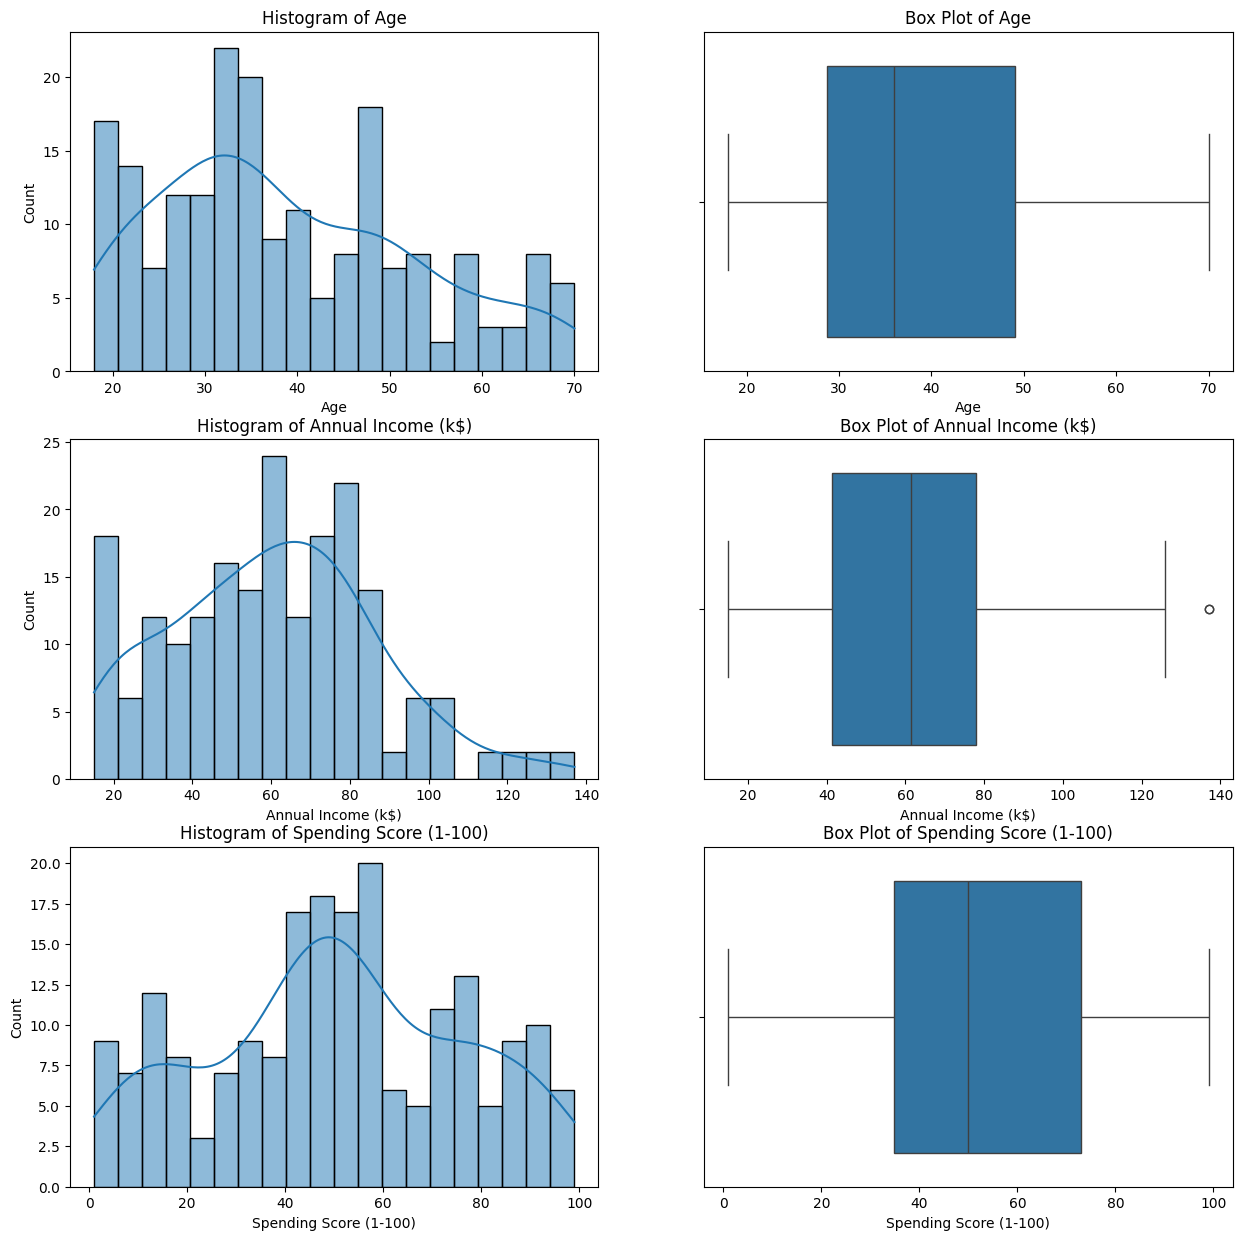

In [11]:
# Visualizing histograms and box plots for each numerical feature
hist = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for i, col in enumerate(hist.columns):
    sns.histplot(df[col], ax=axes[i, 0], bins=20, kde=True)
    axes[i, 0].set_title(f'Histogram of {col}')

    sns.boxplot(x=df[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Box Plot of {col}')

In [9]:
# Selecting features for clustering
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Number of clusters
k = 5

# KMeans clustering
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)


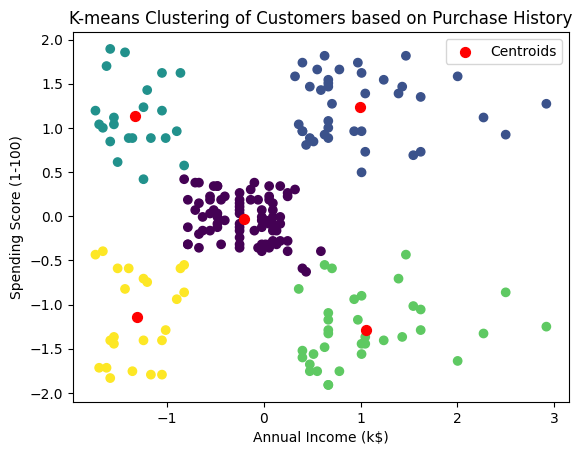

In [10]:

# Visualizing the clusters
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=df['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='.', label='Centroids')
plt.title('K-means Clustering of Customers based on Purchase History')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()